In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.ioff()
# turn of warnings
import warnings
warnings.filterwarnings('ignore')


# Introductory example

Let us start with a short example of a self defined model (Of course, we
provide a lot of predefined models `gstools.covmodel`,
but they all work the same way).
Therefore we reimplement the Gaussian covariance model
by defining just the "normalized"
[correlation](https://en.wikipedia.org/wiki/Autocovariance#Normalization>) function:

In [2]:
import numpy as np
import gstools as gs

# use CovModel as the base-class
class Gau(gs.CovModel):
    def cor(self, h):
        return np.exp(-(h ** 2))

Here the parameter `h` stands for the normalized range `r / len_scale`.
Now we can instantiate this model:

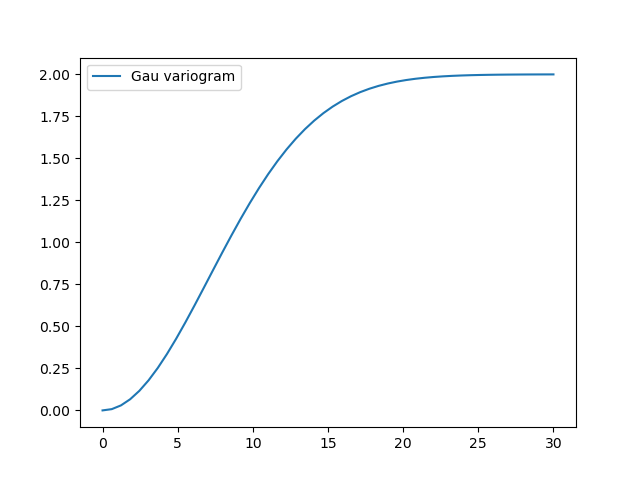

<Axes: >

In [3]:
model = Gau(dim=2, var=2.0, len_scale=10)
ax = model.plot()
model.plot("covariance", ax=ax)
model.plot("correlation", ax=ax)

This is almost identical to the already provided `Gaussian` model.
There, a scaling factor is implemented so the len_scale coincides with the
integral scale:

In [4]:
gau_model = gs.Gaussian(dim=2, var=2.0, len_scale=10)
ax = gau_model.plot(ax=ax)

## Parameters

We already used some parameters, which every covariance models has.
The basic ones are:

- `dim` : dimension of the model
- `var` : variance of the model (on top of the subscale variance)
- `len_scale` : length scale of the model
- `nugget` : nugget (subscale variance) of the model

These are the common parameters used to characterize
a covariance model and are therefore used by every model in GSTools.
You can also access and reset them:

In [5]:
print("old model:", model)
model.dim = 3
model.var = 1
model.len_scale = 15
model.nugget = 0.1
print("new model:", model)

old model: Gau(dim=2, var=2.0, len_scale=10.0, nugget=0.0)
new model: Gau(dim=3, var=1.0, len_scale=15.0, nugget=0.1)


## Note
- The sill of the variogram is calculated by `sill = variance + nugget`
     So we treat the variance as everything **above** the nugget,
     which is sometimes called **partial sill**.
- A covariance model can also have additional parameters.